In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('D:/DSE/Capstone Project/DataCo/DataCoSupplyChainDataset.csv', encoding='latin')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day

df.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1,inplace=True)
df.drop(['order_date'],axis=1,inplace=True)

In [6]:
# Dropping irrelevant columns
not_needed=['Product Image','Product Status','Customer Email','Customer Password','Customer Fname','Customer Lname','Product Name','Delivery Status']
df.drop(not_needed,axis=1,inplace=True)

In [7]:
# Dropping Duplicate Columns
dup_col = ['Product Category Id','Order Item Product Price','Order Item Cardprod Id','Order Profit Per Order','Sales per customer','Order Customer Id']
df.drop(dup_col,axis=1,inplace=True)

In [8]:
# Dropping Columns with many Missing Values
miss_percent = (df.isnull().sum()*100/df.isnull().count())
k = miss_percent[miss_percent>80]
df.drop(k.index,axis=1,inplace=True)

In [9]:
category =  df.select_dtypes(include='object').columns
category

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Shipping Mode'],
      dtype='object')

In [10]:
numeric = df.select_dtypes(include='number').columns
numeric = numeric.drop('Late_delivery_risk')

In [11]:
numeric

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Customer Id', 'Customer Zipcode',
       'Department Id', 'Latitude', 'Longitude', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Product Card Id', 'Product Price', 'order_year',
       'order_month', 'order_day'],
      dtype='object')

In [12]:
df.isnull().sum()>0

Type                             False
Days for shipping (real)         False
Days for shipment (scheduled)    False
Benefit per order                False
Late_delivery_risk               False
Category Id                      False
Category Name                    False
Customer City                    False
Customer Country                 False
Customer Id                      False
Customer Segment                 False
Customer State                   False
Customer Street                  False
Customer Zipcode                  True
Department Id                    False
Department Name                  False
Latitude                         False
Longitude                        False
Market                           False
Order City                       False
Order Country                    False
Order Id                         False
Order Item Discount              False
Order Item Discount Rate         False
Order Item Id                    False
Order Item Profit Ratio  

In [13]:
# For Customer Zipcode
cust_zip = df[df['Customer Zipcode'].isnull()]
cust_zip

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,CA,EE. UU.,14577,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,CA,EE. UU.,17171,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,CA,EE. UU.,14046,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


In [14]:
for i in cust_zip.index:
    df.iloc[i,df.columns.get_loc('Customer Zipcode')] = df.iloc[i,df.columns.get_loc('Customer State')]
    df.iloc[i,df.columns.get_loc('Customer State')]   = df.iloc[i,df.columns.get_loc('Customer City')]
    df.iloc[i,df.columns.get_loc('Customer City')]    = df.iloc[i,df.columns.get_loc('Customer Street')]

In [15]:
df['Customer Zipcode'] = df['Customer Zipcode'].astype('float')

In [16]:
df.iloc[cust_zip.index]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,Elk Grove,EE. UU.,14577,Consumer,CA,Elk Grove,95758.0,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,Elk Grove,EE. UU.,17171,Corporate,CA,Elk Grove,95758.0,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,El Monte,EE. UU.,14046,Consumer,CA,El Monte,91732.0,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


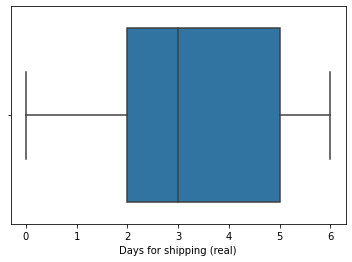

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


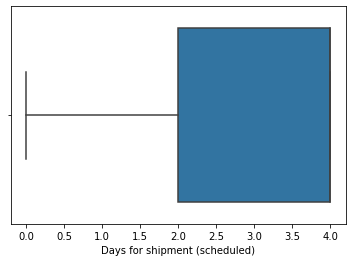

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


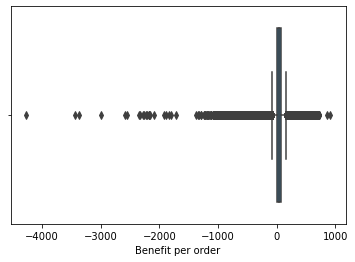

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


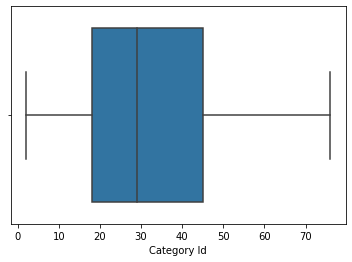

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


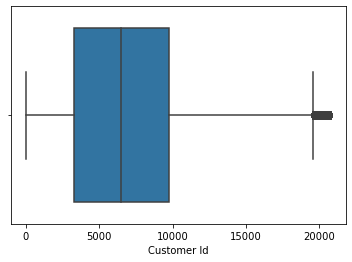

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


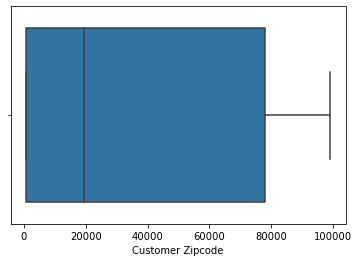

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


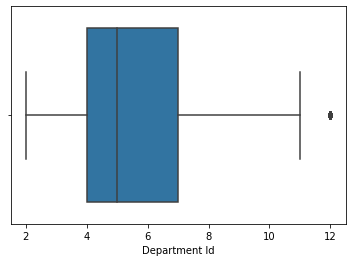

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


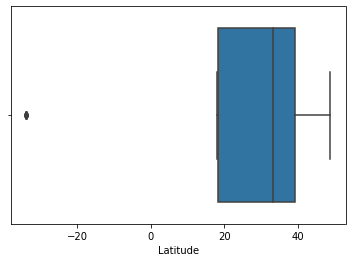

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


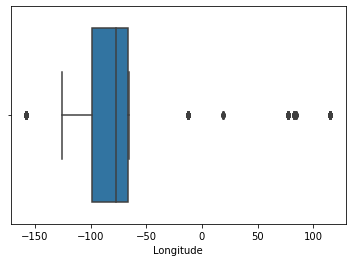

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


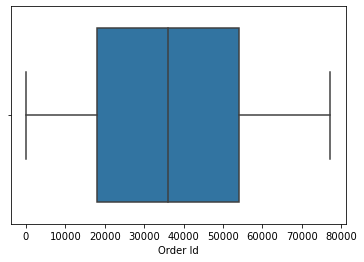

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


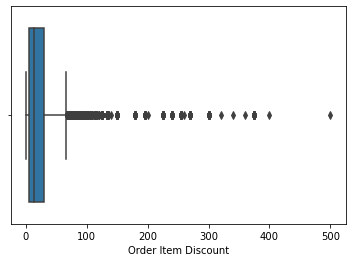

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


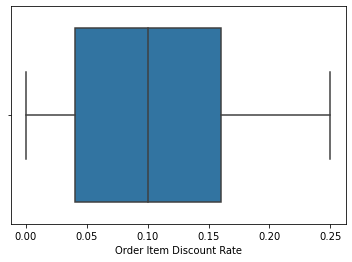

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


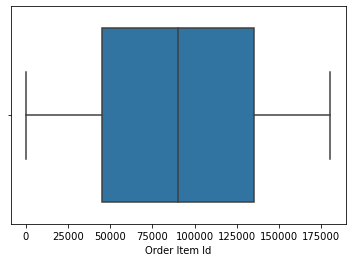

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


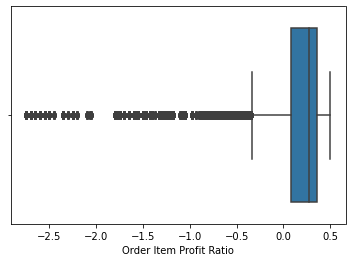

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


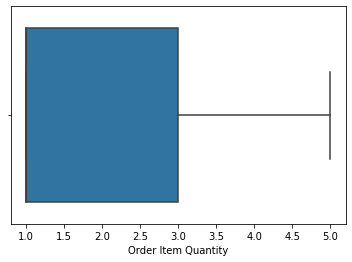

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


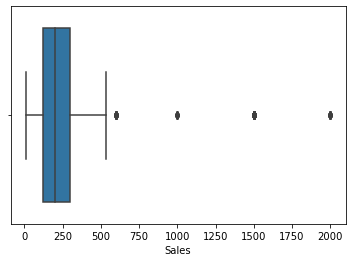

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


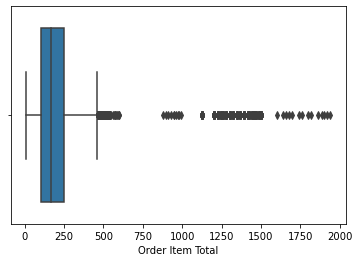

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


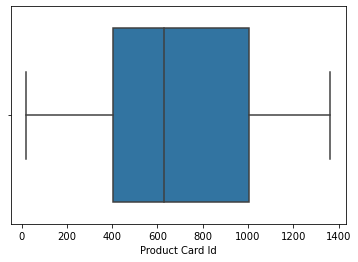

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


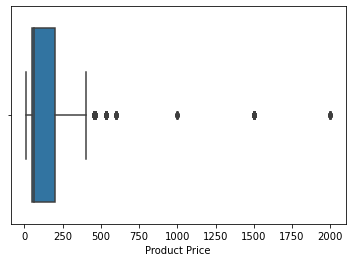

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


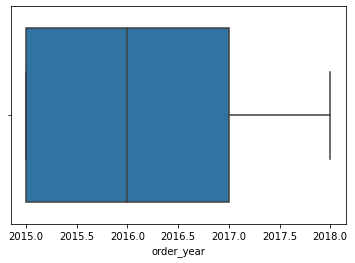

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


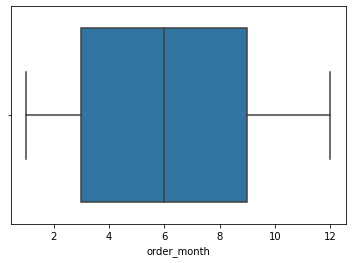

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


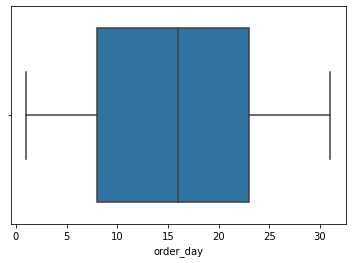

In [17]:
for i in df[numeric].columns:
    sns.boxplot(df[i])
    plt.show()

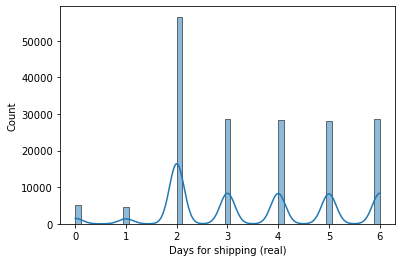

Skewness: 0.08477127299528447
Kurtosis: -1.0079135834813695


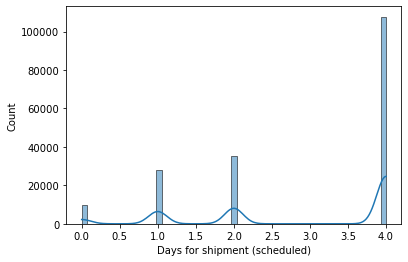

Skewness: -0.7319982842174512
Kurtosis: -1.022948807002554


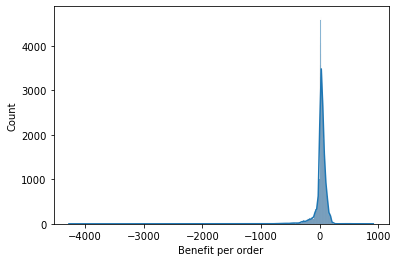

Skewness: -4.741834070263963
Kurtosis: 71.37725865589996


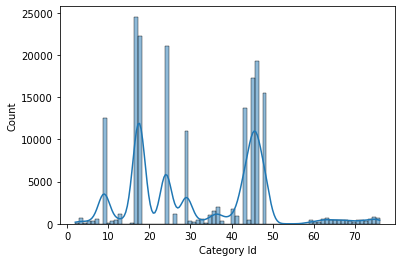

Skewness: 0.36162479939405345
Kurtosis: -0.6032610082781633


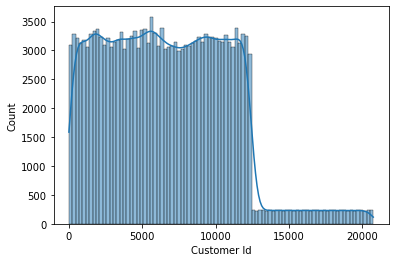

Skewness: 0.4887682515125228
Kurtosis: 0.01489882225969863


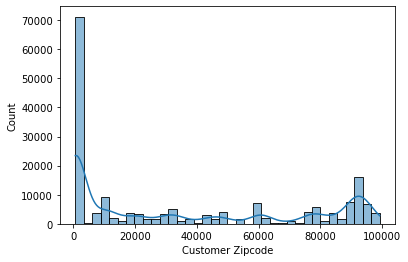

Skewness: 0.4908431275362902
Kurtosis: -1.4514710111051972


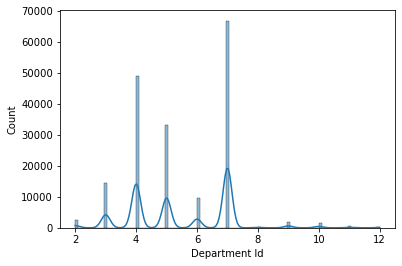

Skewness: 0.27332062913380367
Kurtosis: -0.1816965071010963


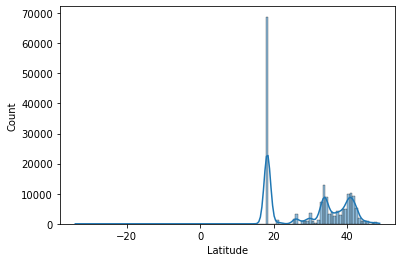

Skewness: -0.09796266622983082
Kurtosis: -1.555414896762957


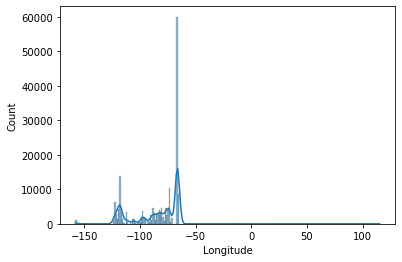

Skewness: -0.49846107256762173
Kurtosis: 2.1809822262082186


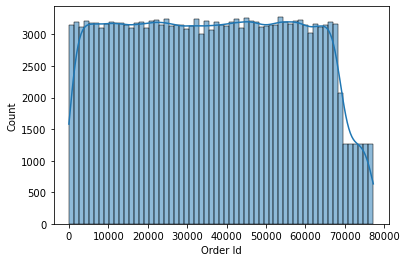

Skewness: 0.03270879463405791
Kurtosis: -1.1529356732614673


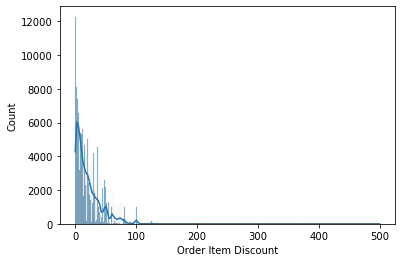

Skewness: 3.0397955138175647
Kurtosis: 25.23126719429707


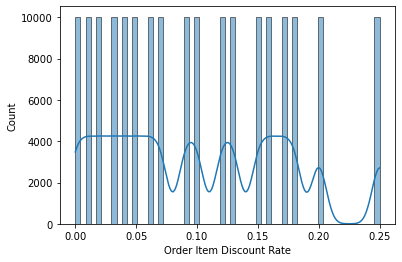

Skewness: 0.34092760117630283
Kurtosis: -0.9011568626673041


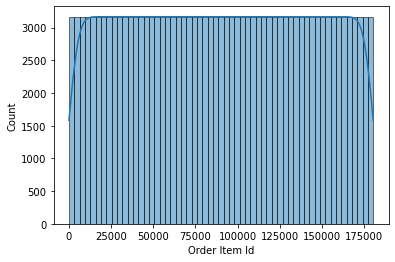

Skewness: 8.45546610224744e-18
Kurtosis: -1.2000000000000002


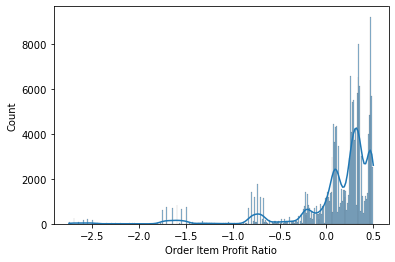

Skewness: -2.8935313411242607
Kurtosis: 10.157224522792497


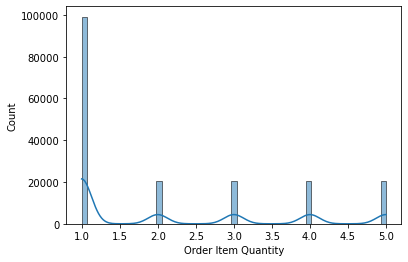

Skewness: 0.8802518478906194
Kurtosis: -0.7537015772317002


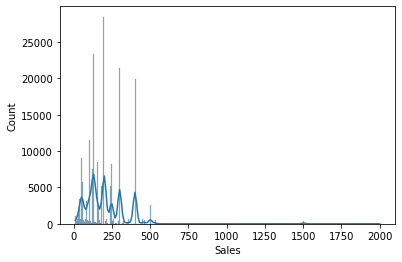

Skewness: 2.8842490487299424
Kurtosis: 23.936561265518982


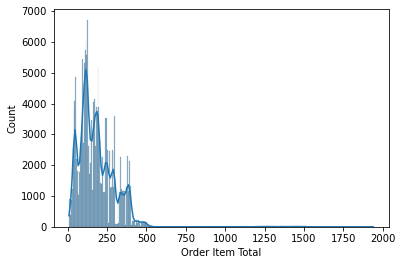

Skewness: 2.888446057030185
Kurtosis: 23.920361513459394


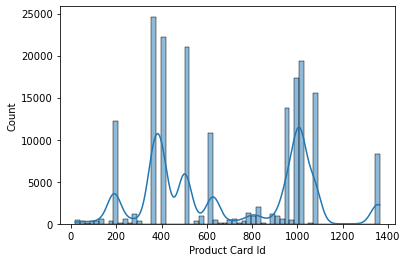

Skewness: 0.1382546099250616
Kurtosis: -1.2674939065869202


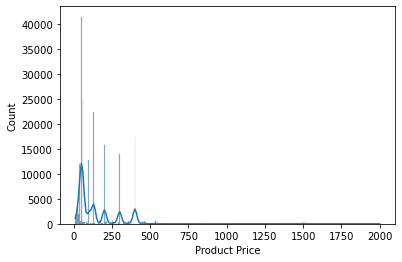

Skewness: 3.191019570200194
Kurtosis: 23.31299748418666


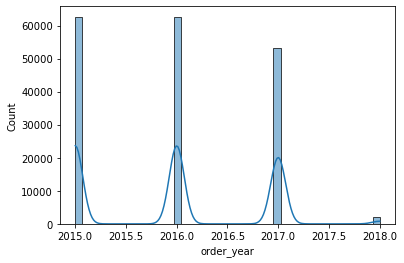

Skewness: 0.177496826562701
Kurtosis: -1.229017432237502


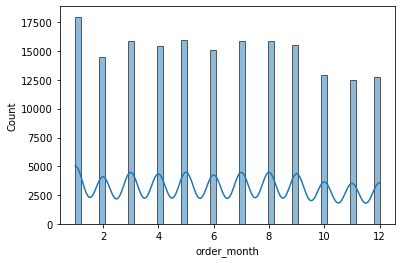

Skewness: 0.0680187376580108
Kurtosis: -1.1608437648614616


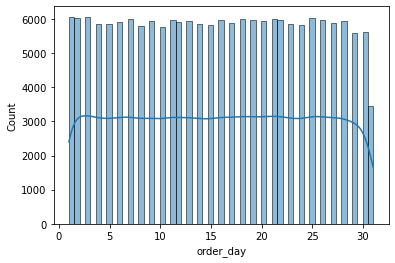

Skewness: 0.002987049192251673
Kurtosis: -1.1966744543492198


In [18]:
for i in df[numeric].columns:
    sns.histplot(df[i], kde=True)
    plt.show()
    print('Skewness:',df[i].skew())
    print('Kurtosis:',df[i].kurt())

## Target Variable

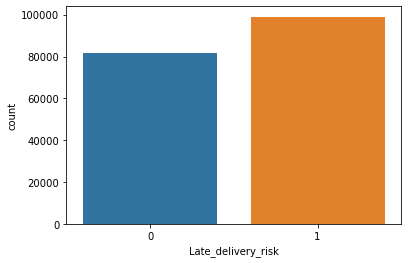

In [19]:
sns.countplot(data=df, x='Late_delivery_risk')
plt.show()

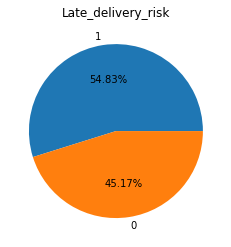

In [20]:
plt.pie(labels = df['Late_delivery_risk'].value_counts().index, autopct='%.2f%%', x=df['Late_delivery_risk'].value_counts().values)
plt.title('Late_delivery_risk')
plt.show()

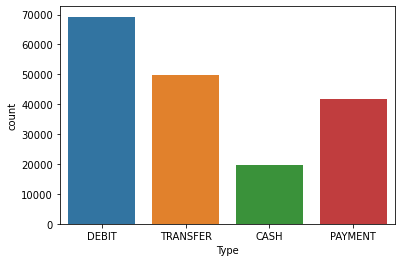

In [21]:
sns.countplot(data=df, x='Type')
plt.show()

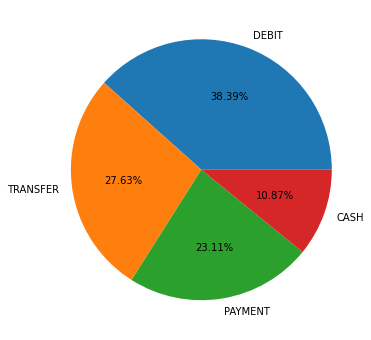

In [22]:
plt.figure(figsize=(6,6))
plt.pie(labels = df['Type'].value_counts().index, autopct='%.2f%%', x=df['Type'].value_counts().values)
plt.show()

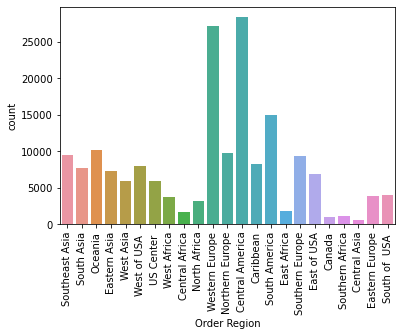

In [23]:
sns.countplot(data=df, x='Order Region')
plt.xticks(rotation=90)
plt.show()

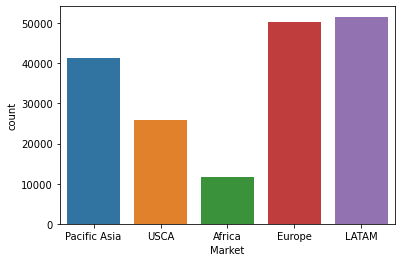

In [24]:
sns.countplot(data=df, x='Market')
plt.show()

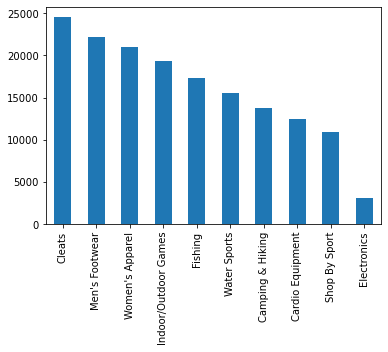

In [25]:
df['Category Name'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.show()

In [26]:
df['Customer Country'].value_counts().index

Index(['EE. UU.', 'Puerto Rico'], dtype='object')

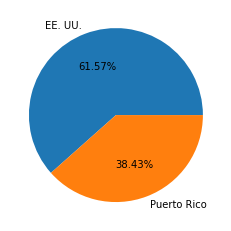

In [28]:
plt.pie(labels = df['Customer Country'].value_counts().index, autopct='%.2f%%', x=df['Customer Country'].value_counts().values)
plt.show()

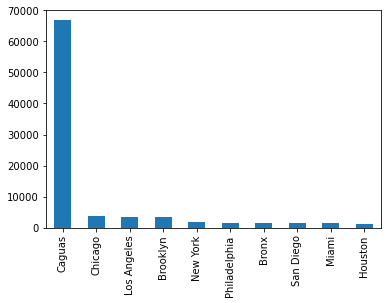

In [29]:
df['Customer City'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.show()

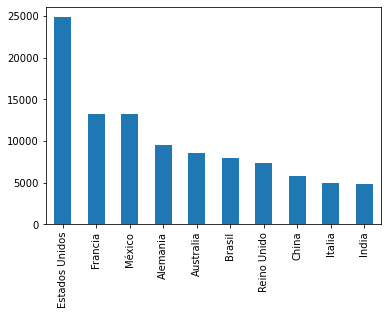

In [30]:
df['Order Country'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.show()

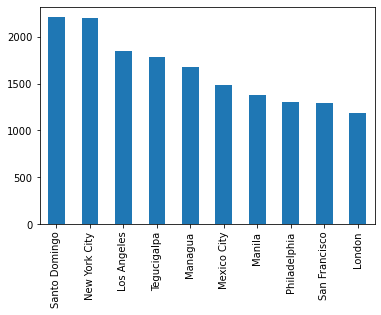

In [31]:
df['Order City'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.show()

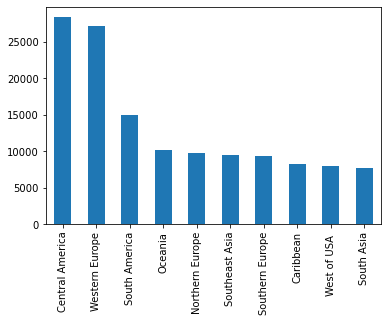

In [32]:
df['Order Region'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.show()

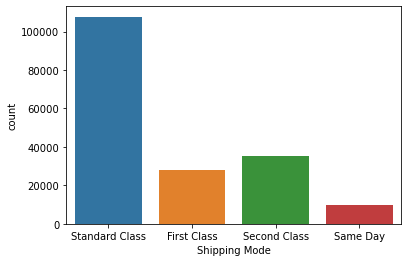

In [33]:
sns.countplot(data=df, x='Shipping Mode')
plt.show()

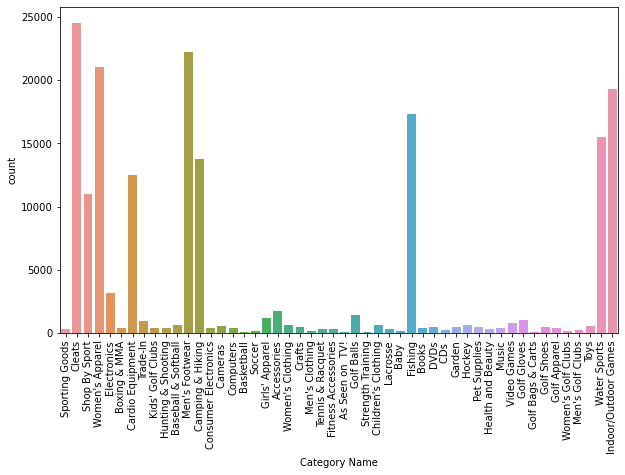

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Category Name'])
plt.xticks(rotation=90)
plt.show()

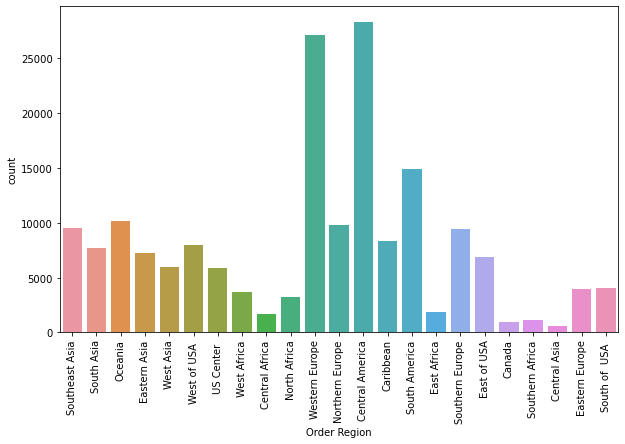

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Order Region'])
plt.xticks(rotation=90)
plt.show()

## EDA for Late Delivery

Order Status vs Late_delivery_risk


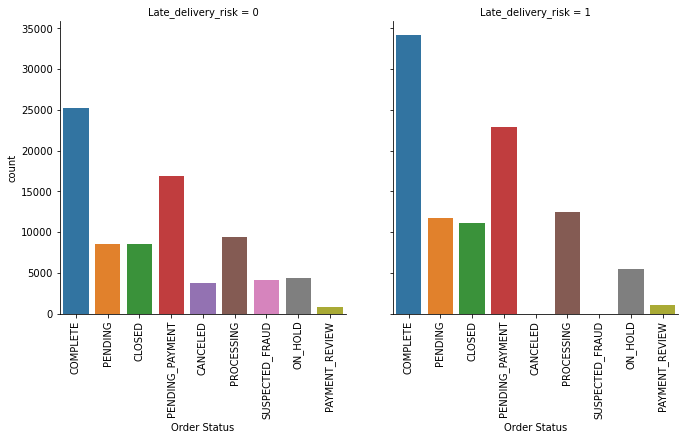

In [45]:
titlex = 'Order Status vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Order Status', col = 'Late_delivery_risk', kind = 'count')
a.set_xticklabels(rotation=90)
plt.show()

Shipping Mode vs Late_delivery_risk


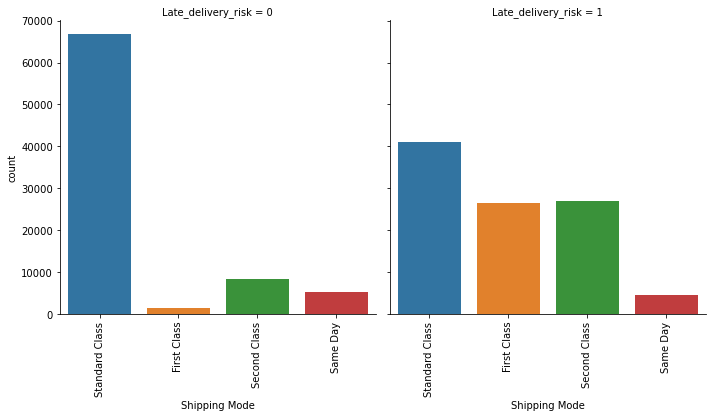

In [46]:
titlex = 'Shipping Mode vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Shipping Mode', col = 'Late_delivery_risk', kind = 'count')
a.set_xticklabels(rotation=90)
plt.show()

Market vs Late_delivery_risk


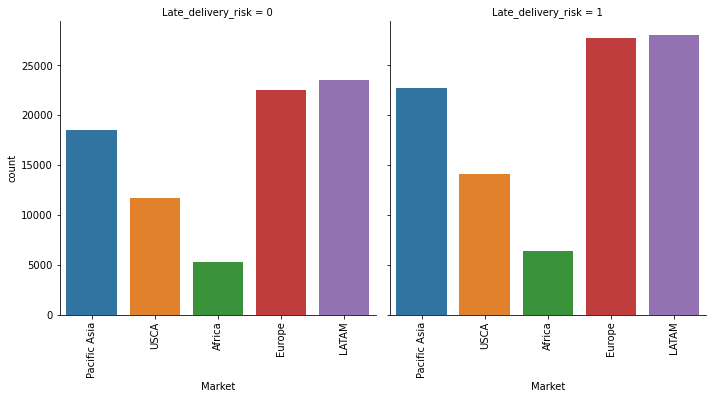

In [47]:
titlex = 'Market vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Market', col = 'Late_delivery_risk', kind = 'count')
a.set_xticklabels(rotation=90)
plt.show()

Payment Type vs Late_delivery_risk


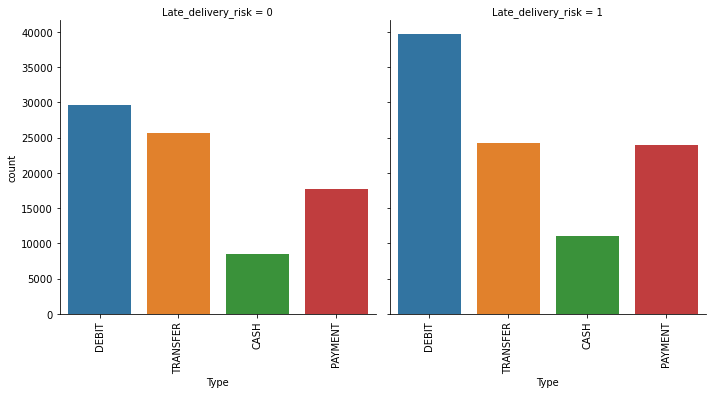

In [48]:
titlex = 'Payment Type vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Type', col = 'Late_delivery_risk', kind = 'count')
a.set_xticklabels(rotation=90)
plt.show()

Order Region vs Late_delivery_risk


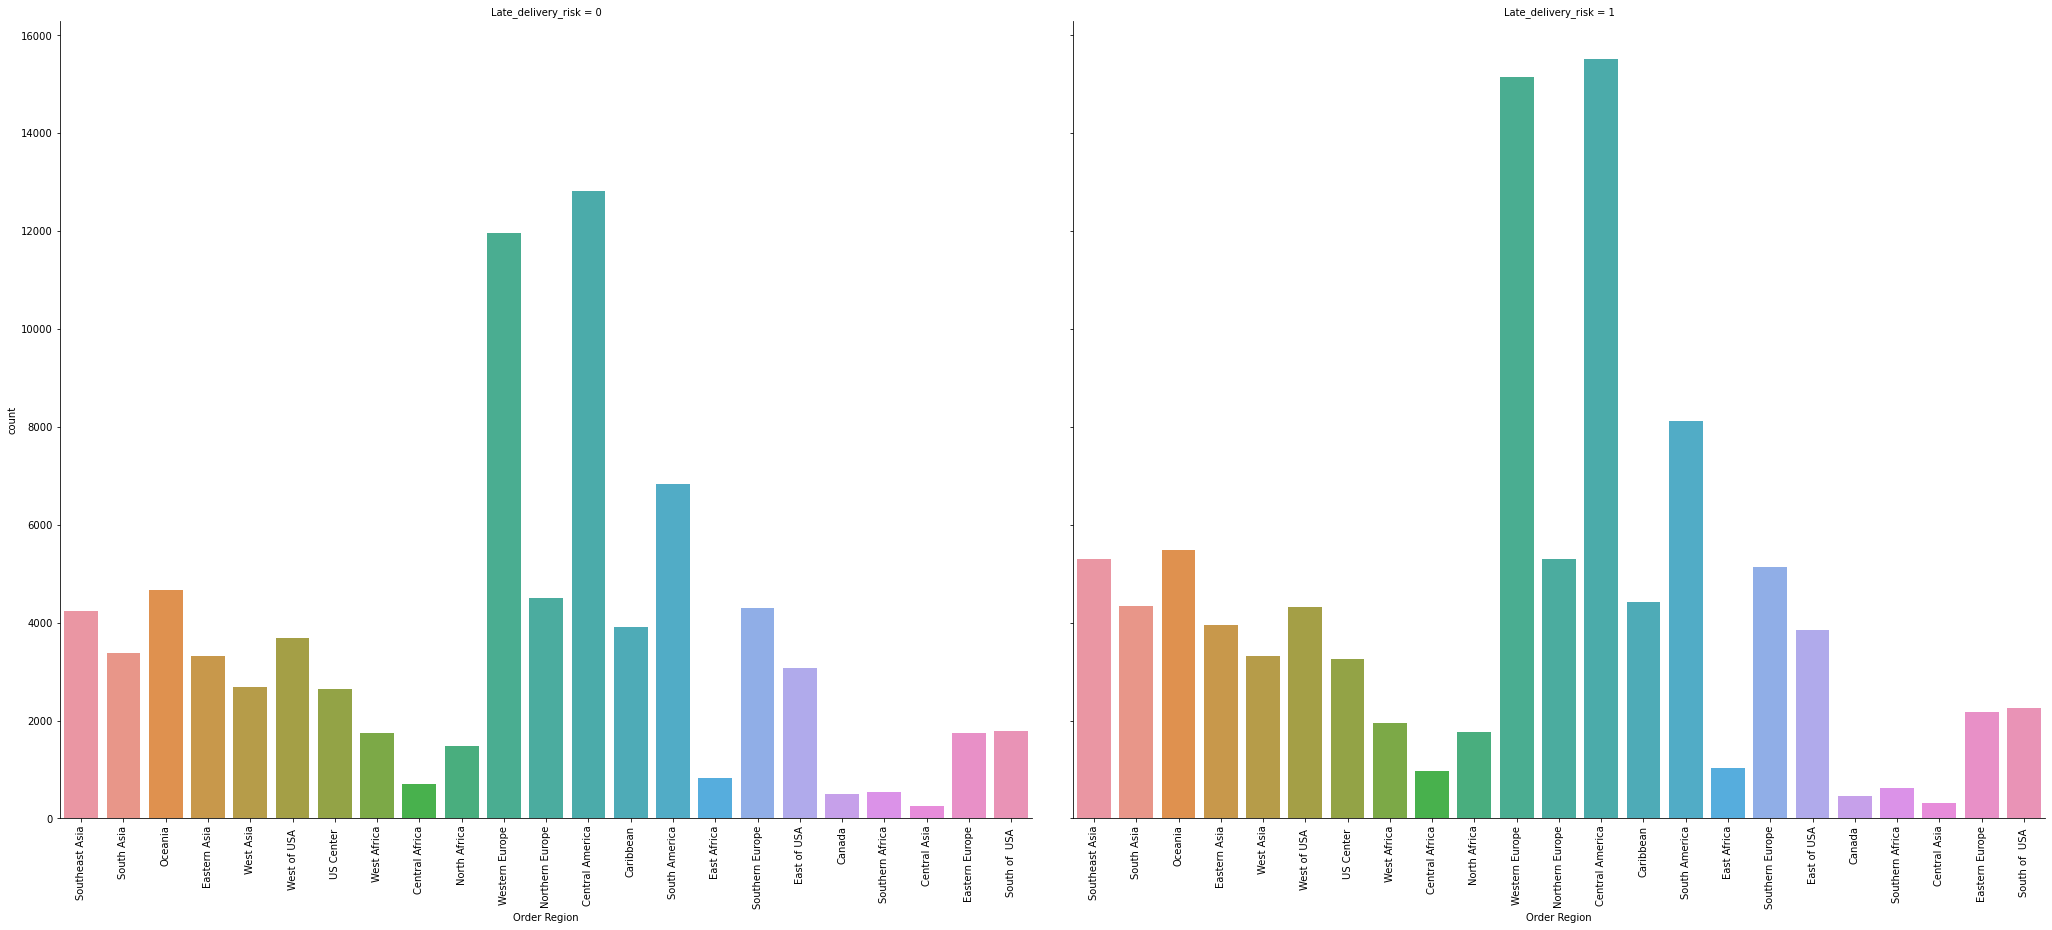

In [50]:
titlex = 'Order Region vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Order Region', col = 'Late_delivery_risk', kind = 'count', height=12, aspect=1.2)
a.set_xticklabels(rotation=90)
plt.show()

Category Name vs Late_delivery_risk


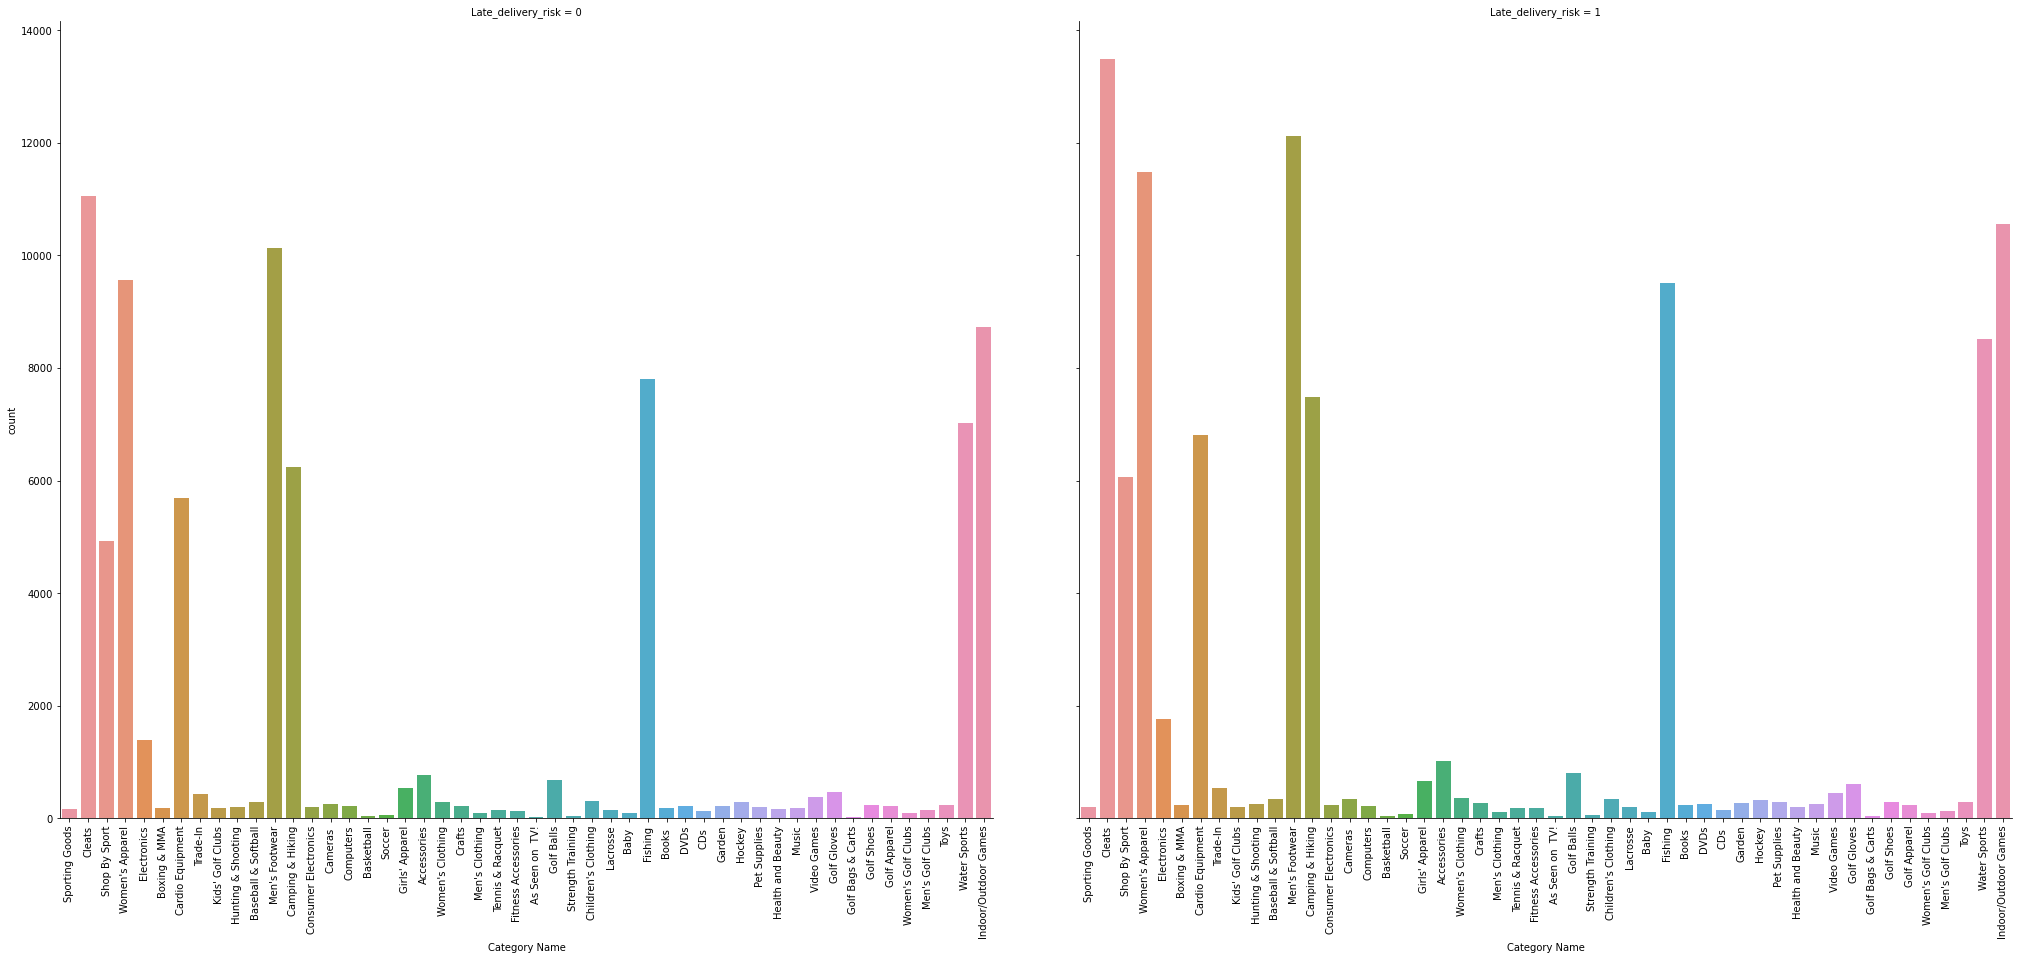

In [51]:
titlex = 'Category Name vs Late_delivery_risk'
print(titlex)
a = sns.catplot(data = df,  x = 'Category Name', col = 'Late_delivery_risk', kind = 'count', height=12, aspect=1.2)
a.set_xticklabels(rotation=90)
plt.show()